## 1. Feature Engineering
### 1.1. Theory.
Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables. 

For example, if we were looking at information on houses, the features would be things like square foot, number of rooms, etc. This course is designed for data scientists who want to expand their knowledge of how to incorporate feature engineering into their data science workflow.

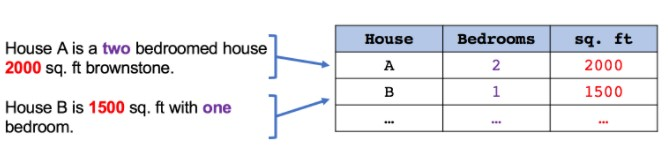

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Different types of data
Most machine learning algorithms require their input data to be represented as a vector or a matrix, and many assume that the data is distributed normally. 

In the real world, more often than not you will receive data that is not in this format. You will also need to work with many different types of data, some data types you will often encounter are: 
- continuous variables, 
- categorical data, 
- ordinal data, 
- boolean values, and 
- dates and times. 

Dealing with these is manageable, but requires a well thought out approach. Feature engineering is often overlooked in machine learning discussions, but any real-world practitioner will confirm that data manipulation and feature engineering is the most important aspect of the project.


#### Pandas
Now lets jump straight in with some examples. During this course we will be leveraging the pandas package substantially as it is very useful when working with data in tabular form. It is a common practice to import pandas using the pd alias. 

You can use the `read_csv() function` to import a `CSV file` and use the `head()` method to quickly look at the first few rows of the DataFrame.

In [2]:
import pandas as pd
data = pd.read_csv(r"../input/feml-dataset/Combined_DS_v10.csv")
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


#### Column names
To see the features used in this subset, you can use the DataFrame columns attribute to print the names of all the columns in the DataFrame.

In [3]:
data.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'Country',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary'],
      dtype='object')

#### Column types
To print the data type of each column, you can use the `dtypes attribute`. Here you can see three different data types - integers, floats and objects - in pandas objects are columns that contain strings.

In [4]:
data.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

#### Selecting specific data types
Knowing the types of each column can be very useful if you are performing analysis based on a subset of specific data types. To do this, you can use the `select_dtypes()` method and pass a list of relevant data types to the include argument. 

For example, if you want to select only the integer columns, call the `select_dtypes()` method on df and set the include argument to `'int'`.

In [5]:
int_fea = data.select_dtypes(include = ['int'])
int_fea.columns

Index(['Age', 'Years Experience'], dtype='object')

### 1.2. PRACTICES
#### Exercise 1.2.1. Getting to know your data
`Pandas` is one the most popular packages used to work with tabular data in Python. It is generally imported using the alias pd and can be used to load a CSV (or other delimited files) using `read_csv()`.

You will be working with a modified subset of the [Stackoverflow survey response data](https://insights.stackoverflow.com/survey/2018/#overview) in the first three chapters of this course. This [data](https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv) set records the details, and preferences of thousands of users of the StackOverflow website.
#### SOLUTION

In [6]:
so_survey_csv = 'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


- Print the data type of each column

In [7]:
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


#### Exercise 1.2.2. Selecting specific data types
Often a data set will contain columns with several different data types (like the one you are working with). The majority of machine learning models require you to have a consistent data type across features. Similarly, most feature engineering techniques are applicable to only one type of data at a time. For these reasons among others, you will often want to be able to access just the columns of certain types when working with a DataFrame.

The DataFrame (so_survey_df) from the previous exercise is available in your workspace.
#### SOLUTION

In [8]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


## 2. Dealing with categorical features
### 2.1. Theory.
Categorical variables are used to represent groups that are `qualitative` in nature. Some examples are 
- `colors`, such as `blue`, `red`, `black` etc. or 
- `country` of birth, such as `Ireland`, `England` or `USA`. 

While these can easily be understood by a human, you will need to encode categorical features as `numeric values` to use them in your machine learning models.

#### Encoding categorical features
As an example, here is a table which consists of the country of residence of different respondents in the Stackoverflow survey. 

To get from qualitative inputs to quantitative features, one may naively think that assigning every category in a column a number would suffice, for example India could be 1, USA 2 etc. 

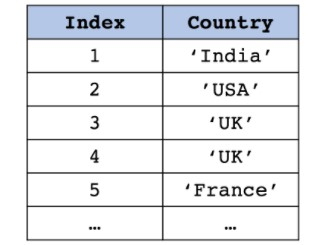

In [9]:
## Hình minh họa Image(fig1, height, width)

But these categories are unordered, so assigning this order may greatly penalize the effectiveness of your model. Thus, you cannot allocate arbitrary numbers to each category as that would imply some form of ordering in the categories.

Instead, values can be encoded by creating additional binary features corresponding to whether each value was picked or not as shown in the table on the right. 

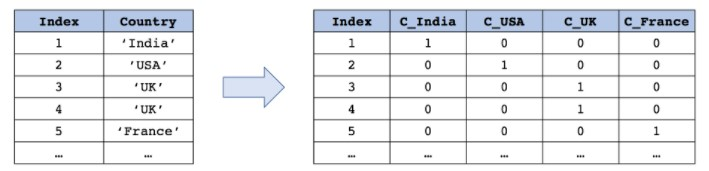

In [10]:
## Hình minh họa Image(fig1, height, width)

In doing so your model can leverage the information of what country is given, without inferring any order between the different options.

There are two main approaches when representing categorical columns in this way, 
- one hot encoding and 
- dummy encoding. 

These are very similar and often confused. In fact, by default, `pandas` performs one-hot encoding when you use the `get_dummies()` function.

#### One-hot encoding
`One-hot encoding` converts n categories into `n features` as shown here. 
- You can use the `get_dummies()` function to **one-hot encode columns**. The function takes a DataFrame and a list of categorical columns you want converted into one hot encoded columns, and returns an updated DataFrame with these columns included. 
- Specifying a `prefix` with the prefix argument can improve readability like the letter `C` for country has been used here.

In [11]:
Country_C_df = pd.get_dummies(data, columns = ['Country'], prefix = 'C')
country_C = [x for x in Country_C_df.columns if x.startswith('C_')]
Country_C_df[country_C].head()

,C_France,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0


#### 2) Dummy encoding
On the other hand, dummy encoding creates `n-1 features `for `n categories`, **omitting the first category**. 

Notice that this time there is no feature for France, the first category.

- In dummy encoding, the base value, France in this case, is encoded by the absence of all other countries as you can see on the last row here and its value is represented by the intercept. 
- For dummy encoding, you can use the same `get_dummies()` function with an additional argument, `drop_first` set to True as shown here.

In [12]:
Country_C_df_dum = pd.get_dummies(data, columns = ['Country'], 
                                  drop_first = True,prefix = 'C')
country_C_dum = [x for x in Country_C_df_dum.columns if x.startswith('C_')]
Country_C_df_dum[country_C_dum].head()

,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0


#### One-hot vs. dummies
Both these methods have different advantages. 
- `One-hot encoding` generally creates much **more explainable features**, as each country will have its own weight that can be observed after training. 
- **But** one must be aware that `one hot encoding` may **create features that are entirely collinear due to the same information being represented multiple times**.

Take for example a simpler categorical column recording the sex of the survey takers. 

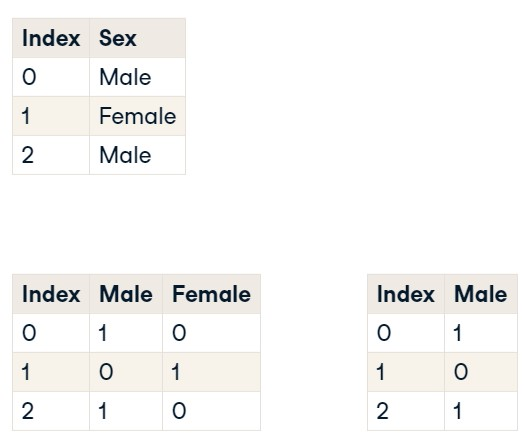

In [13]:
## Hình minh họa Image(fig1, height, width)

By recording a 1 for male the information of whether the person is female is already known when the male column is 0. This double representation can lead to instability in your models and dummy values would be more appropriate.

#### Limiting your columns
However, both one-hot encoding and dummy encoding may result in a huge number of columns being created if there are too many different categories in a column. In these cases, you may want to only create columns for the most common values. 

You can check the number of occurrences of different features in a column using the `value_counts()` method on a specific column.

In [14]:
counts = data['Country'].value_counts()
counts

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

Once you have your counts of occurrences, you can use it to limit what values you will include by **first creating a mask** of the values that occur less than n times. 

A `mask` is a *list of booleans* outlining which values in a column should be affected. 
- First we find the categories that occur less than n times using the index attribute and wrap this inside the `isin()` method. 

In [15]:
mask = data['Country'].isin(counts[counts < 10].index)

- After you create the mask, you can use it to replace these categories that occur less than n times with a value of your choice as shown here.

In [16]:
data['Country'][mask] = 'Other'
print(pd.value_counts(data.loc[:, 'Country']))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 2.2. PRACTICES
#### Exercise 2.2.1. One-hot encoding and dummy variables
To use categorical variables in a machine learning model, you first need to represent them in a quantitative way. The two most common approaches are to one-hot encode the variables using or to use dummy variables. In this exercise, you will create both types of encoding, and compare the created column sets. We will continue using the same DataFrame from previous lesson loaded as `data` and focusing on its Country column.
#### SOLUTION
- One-hot encode the Country column, adding "OH" as a prefix for each column.

In [17]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(data, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Other', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA'],
      dtype='object')


- Create dummy variables for the Country column, adding "DM" as a prefix for each column.

In [18]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


**Comments.**
Notice that the column for France was missing when you created dummy variables? Now you can choose to use one-hot encoding or dummy variables where appropriate.

#### Exercise 2.2.2. Dealing with uncommon categories
Some features can have many different categories but a very uneven distribution of their occurrences. Take for example Data Science's favorite languages to code in, some common choices are Python, R, and Julia, but there can be individuals with bespoke choices, like FORTRAN, C etc. In these cases, you may not want to create a feature for each value, but only the more common occurrences.
#### SOLUTION.

In [19]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 100 times
mask = countries.isin(country_counts[country_counts < 100].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

Other           301
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Name: Country, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## 3. Numeric variables
As mentioned in the previous lesson, most machine learning models will require your data to be in numeric format. However, even if your raw data is all numeric, there is still a lot you can do to improve your features.
### 3.1. Theory
#### Types of numeric features
Numeric features can be used to represent a huge array of different characteristics and measurements. Pretty much anything that can be quantitatively measured can be recorded as numeric data. 

For example, age, the price of an item, counts, and even spatial data such as coordinates. 

Depending on the use case, numeric features can be treated in several different ways. 

We will work through a few of the considerations and possible feature engineering steps to keep in mind when dealing with numeric data.

#### Does size matter?
One of the first questions you should ask when working with numeric features is whether the magnitude of the feature is its most important trait, or just its direction.

For example, if you had a dataset of restaurant health and safety ratings containing the number of times a restaurant had major violations, you might care far more about whether the restaurant had any major violations at all (as you would rather not take any chances), over whether it was a repeat offender. 

Looking at this toy dataset containing `restaurant IDs` and the number of times they had major violations, we can see that some restaurants have no major violations but many have one or more. 

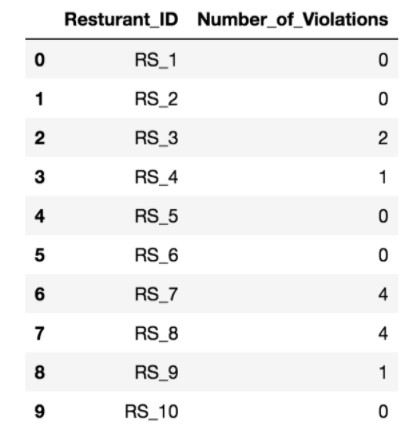

In [20]:
## Hình minh họa Image(fig1, height, width)

We will be creating a new binary column representing whether or not a restaurant committed any violation.

#### Binarizing numeric variables
Here we first create a new column `Binary_Violation` and set it to zero. 

Then, we use the `df.loc` notation to find all rows where Number_of_Violations is greater than zero and set the `Binary_Violation` column to 1.

As you can see here, all rows where `Number_of_Violations` is equal to 0 are also zeros in Binary_Violation. However, for all rows where `Number_of_Violations` is greater than zero is 1 in `Binary_Violation`.

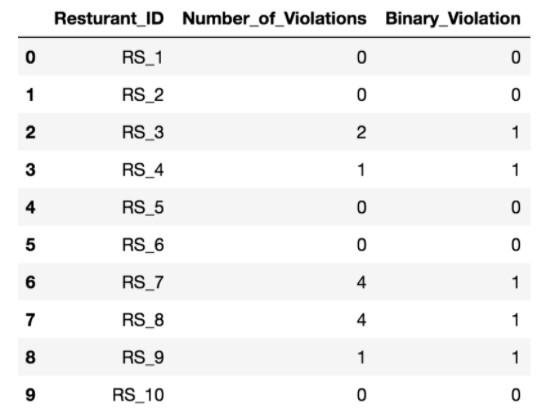

In [21]:
## Hình minh họa Image(fig1, height, width)

#### Binning numeric variables
An extension of this is perhaps you wish to group a numeric variable into more than two bins. This is often useful for variables such as age, wage brackets, etc where exact numbers are less relevant than the general magnitude of the value. 

Consider the same dataset of restaurant health and safety ratings containing the number of times a restaurant has had major violations. This time we will be creating three groups,
- Group 1, for restaurants with no offenses,
- Group 2 for restaurants with one or two offenses and 
- group 3 for all restaurants with three or more offenses. 

`Bins` are created by using the pandas' cut() function. You can define the intervals using the bins argument as shown here, which in this case is a list of 4 values. You can also pass a list of labels like so.

#### Binning numeric variables
Note as we want to include 0 in the first bin, we must set the leftmost edge to lower than that, so all values between negative infinity and 0 are labeled as 1, all values equal to 1 or 2 are labeled as 2, and values greater than 2 are labeled as 3.

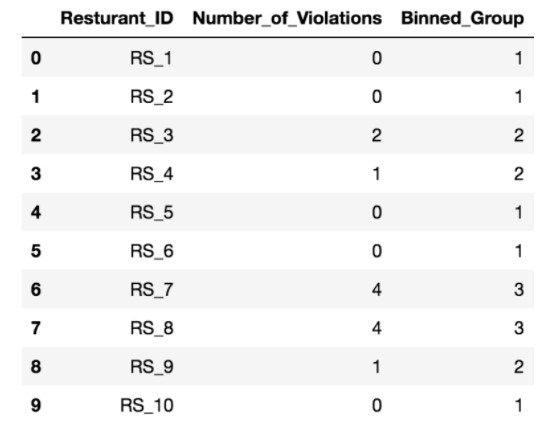

In [22]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES
#### Exercise 3.2.1. Binarizing columns
While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column.

In the `data`, you have a large number of survey respondents that are working voluntarily (without pay). You will create a new column titled `Paid_Job` indicating whether each person is paid (their salary is greater than zero).
#### SOLUTION.

In [23]:
# Create the Paid_Job column filled with zeros
data['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
data.loc[data['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(data[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


#### Exercise 3.2.2. Binning values
For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

Bins are created using `pd.cut(df['column_name'], bins)` where bins can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries.
#### SOLUTION
- Bin the value of the ConvertedSalary column in so_survey_df into 5 equal bins, in a new column called equal_binned.

In [24]:
# Bin the continuous variable ConvertedSalary into 5 bins
data['equal_binned'] = pd.cut(data['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(data[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


- Bin the ConvertedSalary column using the boundaries in the list bins and label the bins using labels.

In [25]:
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins = bins, 
                                         labels = labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0
